In [8]:
using Random, Distributions, Plots

### ISI„ÅÆÁ¥ØÁ©ç„Å´„Çà„ÇäÁô∫ÁÅ´ÊôÇÂàª„ÇíÊ±Ç„ÇÅ„ÇãÊâãÊ≥ï¬∂

In [27]:
Random.seed!(0)

T = 1000
dt = 1f0
nt = Int32(T/dt)

n_neurons = 10
fr = 30

# ISI„ÅÆÁ¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞„Å´Âæì„Å£„Åü‰π±Êï∞(„Å§„Åæ„ÇäÁô∫ÁÅ´Áéá)„ÇíËøî„Åô(„Åì„Çå„Åå„Çπ„Éë„Ç§„ÇØÊôÇÂàª„Å´„Å™„Çã)
isi = 1/(fr*dt*1e-3) * randexp(Int(nt*1.5/fr), n_neurons)
# „Åù„Çå„Åû„Çå„ÅÆÁ•ûÁµå„Å´ÂØæ„Åó„Å¶Áô∫ÁÅ´„Åó„ÅüÊôÇÂàª„ÇíÁ¥ØÁ©ç„Åô„Çã
spike_time = cumsum(isi, dims=1); # ISI„ÇíÁ¥ØÁ©ç

In [28]:
cumsum(isi, dims=1)

50√ó10 Array{Float64,2}:
   26.0798    11.7774    19.2929  ‚Ä¶    15.7382    46.6112   162.958
   60.7539    30.4794    26.9378      104.168    167.988    171.206
   71.763     95.3457    65.0419      201.379    184.834    184.906
   76.6791   153.2       83.5601      235.58     258.265    202.674
   94.1527   178.9       88.6296      244.253    351.652    204.407
  121.853    229.522     91.9738  ‚Ä¶   286.841    372.014    207.078
  134.116    250.21      98.6145      299.138    384.879    212.515
  135.094    275.585    178.593       304.36     413.277    213.249
  178.137    322.945    216.448       328.301    460.383    217.375
  194.24     357.412    304.814       340.815    521.438    218.561
  232.864    358.367    364.628   ‚Ä¶   398.443    536.567    227.46
  295.653    418.464    379.827       421.181    588.021    277.066
  355.817    435.453    399.039       479.48     616.376    296.112
    ‚ãÆ                             ‚ã±                        
 1196.04    1486.42   

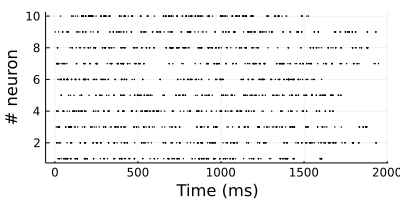

In [29]:
for i=1:n_neurons
    plot!(spike_time[:,i], i*ones(Int(nt*1.5/fr)) ,st=:scatter,markersize=1,color="black")
end
plot(p1, 
    xlabel = "Time (ms)", 
    ylabel = "# neuron",legend=false, size=(400,200))

In [34]:
spike_time[spike_time .> nt - 1] .= 1 # nt„ÇíË∂Ö„Åà„ÇãÂ†¥Âêà„Çí1„Å´
spike_time = round.(Int, spike_time) # float to int
spikes = zeros(nt, n_neurons) # „Çπ„Éë„Ç§„ÇØË®òÈå≤Â§âÊï∞

for i=1:n_neurons    
    spikes[spike_time[:, i], i] .= 1
end

# ÊúÄÂàù„ÅÆnt„ÇíË∂Ö„Åà„ÇãÂ†¥Âêà„Çí1„Å´„Åó„ÅüÊôÇ„ÅÆÂØæÁ≠ñ
spikes[1] = 0 # (spike_time=1)„ÅÆÁô∫ÁÅ´„ÇíÂâäÈô§
println("Num. of spikes : ", sum(spikes))
println("Firing rate : ", sum(spikes)/(n_neurons*T)*1e3, "Hz")

Num. of spikes : 293.0
Firing rate : 29.3Hz


### Œîùë° Èñì„ÅÆÁô∫ÁÅ´Á¢∫Áéá„Åå ùúÜŒîùë° „Åß„ÅÇ„Çã„Åì„Å®„ÇíÂà©Áî®„Åô„ÇãÊñπÊ≥ï

In [30]:
Random.seed!(0) # set random seed

T = 1000 # ms
dt = 1f0 # ms
nt = Int(T/dt) # number of timesteps

n_neurons = 10 # „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞
fr = 30 # „Éù„Ç¢„ÇΩ„É≥„Çπ„Éë„Ç§„ÇØ„ÅÆÁô∫ÁÅ´Áéá(Hz)

spikes = rand(nt, n_neurons) .< fr*dt*1e-3

println("Num. of spikes : ", sum(spikes))
println("Firing rate : ", sum(spikes)/(n_neurons*T)*1e3, "Hz")

Num. of spikes : 304
Firing rate : 30.4Hz


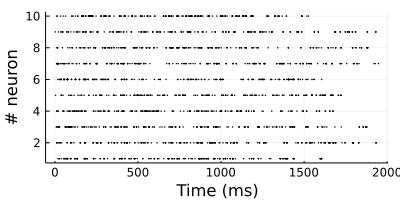

In [37]:
function rasterplot(spikes)
    # input spike -> time, #neurons
    spike_inds = Tuple.(findall(x -> x > 0, spikes)) # Ë°åÂàóÂÜÖ„Åß0„ÇíË∂Ö„Åà„Å¶„Çã„Çπ„Éë„Ç§„ÇØ„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅÆË¶ÅÁ¥†„ÇíÂèñÂæó
    spike_time = first.(spike_inds) # „Çπ„Éë„Ç§„ÇØÊôÇÁ≥ªÂàó
    neuron_inds = last.(spike_inds) # Á•ûÁµå„ÅÆÁï™Âè∑(1~n_neurons)
    
    # raster plot
    plot(spike_time, neuron_inds ,st=:scatter,markersize=1,color="black")
    plot(p1, 
    xlabel = "Time (ms)", 
    ylabel = "# neuron",legend=false, size=(400,200))
end
rasterplot(spikes)

### ÈùûÂÆöÂ∏∏„Éù„ÉØ„ÇΩ„É≥ÈÅéÁ®ã

In [39]:
Random.seed!(0)

T = 1000
dt = 1f0
nt = Int32(T/dt)

n_neurons = Int32(10)

t = Array{Float32}(1:nt)*dt
fr = 30(sin.(1e-2t)).^2 # „Éù„Ç¢„ÇΩ„É≥„Çπ„Éë„Ç§„ÇØ„ÅÆÁô∫ÁÅ´Áéá(Hz)

spikes = rand(nt, n_neurons) .< fr*dt*1e-3 # 1e-3„Çí„Åã„Åë„Çã„ÅÆ„ÅØms„ÅßË©ï‰æ°„Åó„Å¶„ÅÑ„Çã„Åü„ÇÅ

println("Num. of spikes : ", sum(spikes))
println("Firing rate : ", sum(spikes)/(n_neurons*T)*1e3, "Hz")

Num. of spikes : 148
Firing rate : 14.8Hz


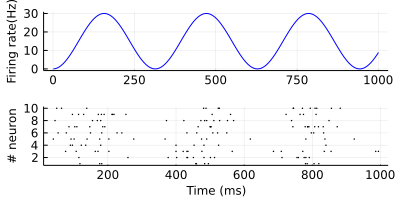

In [47]:
function rasterplot(spikes)
    # input spike -> time, #neurons
    spike_inds = Tuple.(findall(x -> x > 0, spikes)) # Ë°åÂàóÂÜÖ„Åß0„ÇíË∂Ö„Åà„Å¶„Çã„Çπ„Éë„Ç§„ÇØ„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅÆË¶ÅÁ¥†„ÇíÂèñÂæó
    spike_time = first.(spike_inds) # „Çπ„Éë„Ç§„ÇØÊôÇÁ≥ªÂàó
    neuron_inds = last.(spike_inds) # Á•ûÁµå„ÅÆÁï™Âè∑(1~n_neurons)
    
    # raster plot
    p1 = plot(t, fr, color="blue")
    p2 = plot(spike_time, neuron_inds ,st=:scatter,markersize=1,color="black")
    plot(p1, p2 , guidefont=font(8),
    xlabel = ["" "Time (ms)"], 
    ylabel = ["Firing rate(Hz)" "# neuron"],legend=false, size=(400,200), layout = grid(2, 1,  heights=[0.5,0.5]))
end
rasterplot(spikes)

### Ê≠ªÊôÇÈñì‰ªò„Åç„Éù„Ç¢„ÇΩ„É≥ÈÅéÁ®ã„É¢„Éá„É´ (Poisson process with dead time, PPD)

In [54]:
function rasterplot(spikes)
    # input spike -> time, #neurons
    spike_inds = Tuple.(findall(x -> x > 0, spikes)) # Ë°åÂàóÂÜÖ„Åß0„ÇíË∂Ö„Åà„Å¶„Çã„Çπ„Éë„Ç§„ÇØ„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅÆË¶ÅÁ¥†„ÇíÂèñÂæó
    spike_time = first.(spike_inds) # „Çπ„Éë„Ç§„ÇØÊôÇÁ≥ªÂàó
    neuron_inds = last.(spike_inds) # Á•ûÁµå„ÅÆÁï™Âè∑(1~n_neurons)
    
    # raster plot
    plot(spike_time, neuron_inds ,st=:scatter,markersize=1,color="black")
    plot(p1, 
    xlabel = "Time (ms)", 
    ylabel = "# neuron",legend=false, size=(400,200))
end

rasterplot (generic function with 1 method)

  0.006665 seconds (26.96 k allocations: 1.342 MiB)
Num. of spikes : 267.0
Firing rate : 26.700000000000003Hz


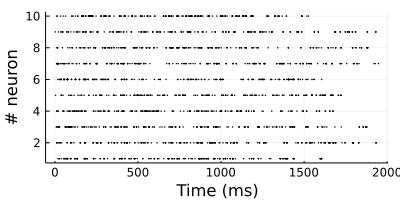

In [55]:
Random.seed!(0)

T = 1000
dt = 1f0
nt = Int32(T/dt)
tref = 5f0 # ‰∏çÂøúÊúü(ms)

n_neurons = Int32(10)
fr = 30

tlast, spikes = zeros(n_neurons), zeros(nt, n_neurons)

# simulation
@time for i=1:nt
    fire = rand(n_neurons) .< fr*dt*1e-3
    spikes[i, :] = ((dt*i) .> (tlast .+ tref)) .* fire # ‰∏çÂøúÊúü„ÅÆÂØæÂá¶
    tlast[:] = tlast .* (1 .- fire) + dt*i * fire # fire„Å™„ÇâÁô∫ÁÅ´ÊôÇÂàª„ÇíÊõ¥Êñ∞„Åô„Çã
end

println("Num. of spikes : ", sum(spikes))
println("Firing rate : ", sum(spikes)/(n_neurons*T)*1e3, "Hz")

rasterplot(spikes)